In [1]:
%matplotlib inline

from __future__ import print_function, division
import numpy as np
import sys, os
from astropy.table import Table
import fitsio
import matplotlib.pyplot as plt

In [3]:
cat = Table.read('/Users/roz18/Desktop/test/old/truth/6dFGS_vizier.fits')
cat.rename_column('_RAJ2000', 'RAJ2000')
cat.rename_column('_DEJ2000', 'DEJ2000')
cat.rename_column('_6dFGS', '6dFGS')
# cat.write('/Users/roz18/Downloads/6dFGS.fits')

In [4]:
print(len(cat))

124647


In [5]:
cat

RAJ2000,DEJ2000,6dFGS,Nm,Nz,bJmag,PrID,rFmag,S_G,f_cz,cz,e_cz,r_cz,q_cz,AV,w,Target,Template,SpecID
deg,deg,,,,mag,,mag,,,km / s,km / s,,,mag,,,,
float64,float64,bytes15,uint8,uint8,float32,int16,float32,uint8,int16,int32,int16,int16,uint8,float32,uint8,int32,bytes9,bytes29
0.01075,-23.36802777777778,g0000026-232205,1,1,16.64,1,15.35,1,0,19966,45,126,4,0.06,8,2,1,758
0.013666666666666666,-36.084444444444436,g0000033-360504,2,2,16.75,1,15.61,1,0,18110,31,126,4,0.05,8,3,3:3,917:117199
0.017583333333333333,-52.36586111111111,g0000042-522157,1,1,17.18,1,15.86,1,0,27523,45,126,4,0.05,8,4,2,1102
0.01775,-50.309555555555555,g0000043-501834,1,1,16.57,1,15.3,1,0,19836,45,126,4,0.05,8,5,2,1124
0.01845833333333333,-0.08333333333333333,g0000044-000500,0,0,15.87,1,14.65,1,0,5400,100,5,9,0.11,8,6,Z,0
0.021041666666666667,-5.209388888888888,g0000051-051234,1,1,15.4,1,14.43,1,0,11368,45,126,4,0.1,8,7,3,116638
0.02158333333333333,-23.24416666666667,g0000052-231439,1,1,16.91,1,15.55,1,0,17850,45,126,4,0.06,8,8,1,685
0.028,-7.875055555555557,g0000067-075230,1,1,17.05,1,15.54,1,0,25174,45,126,4,0.13,8,9,1,450


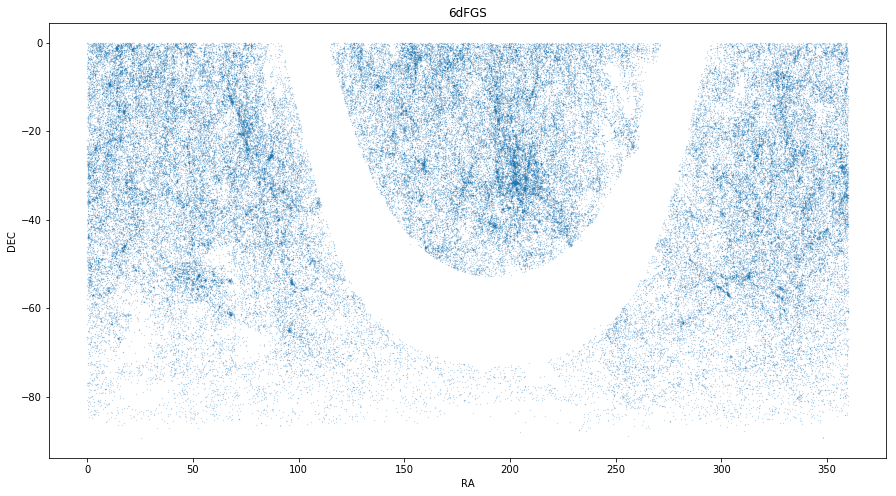

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(cat['RAJ2000'], cat['DEJ2000'], '.', markersize=0.4, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('6dFGS')
plt.show()

__Check for duplicates__

In [7]:
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

In [8]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RAJ2000'], cat['DEJ2000'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

0 objects with a nearby neighbor
0 0.00%


__Match to 2dFGRS and compare cz and redshift__

In [10]:
cat1 = Table.read('/Users/roz18/Desktop/test/old/truth/2dFGRS.fits')
print(len(cat1))

245591


Doubly matched objects = 0
Final matched objects = 6777


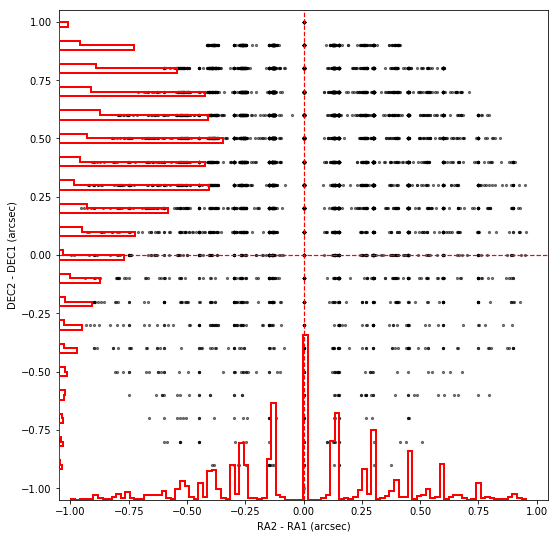

In [13]:
idx1, idx2, _, _, _ = match_coord.match_coord(cat1['RAJ2000'], cat1['DEJ2000'], cat['RAJ2000'], cat['DEJ2000'])

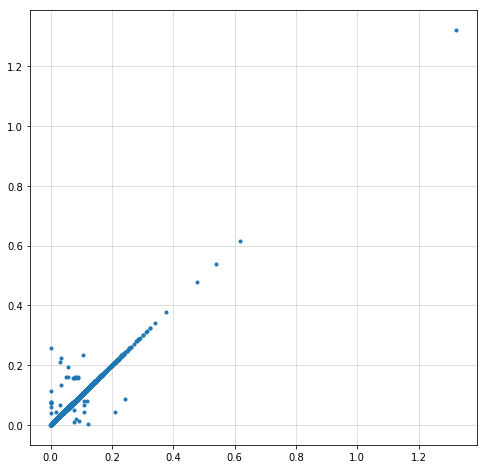

0.5164527076877675 %


In [22]:
plt.figure(figsize=(8, 8))
plt.plot(cat1['z'][idx1], cat['cz'][idx2]/3e5, '.')
plt.grid(alpha=0.5)
plt.show()

print(np.sum(np.abs(cat1['z'][idx1]-cat['cz'][idx2]/3e5)>0.005)/len(idx1)*100, '%')

Doubly matched objects = 0
Final matched objects = 6401


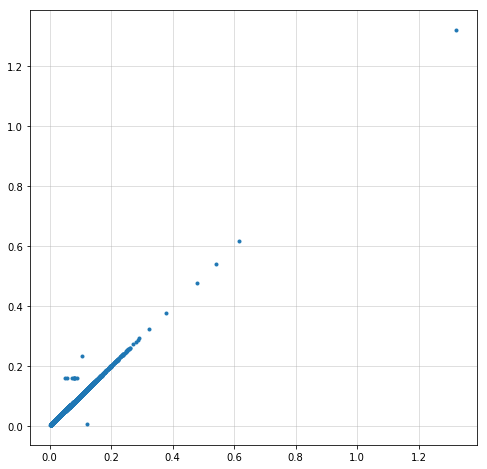

0.1562255897516013 %


In [25]:
mask = (cat['q_cz']==4) & (cat['cz']>0)
mask1 = (cat1['q_z']>=4) & (cat1['z']>0.002)
idx1, idx2, _, _, _ = match_coord.match_coord(cat1['RAJ2000'][mask1], cat1['DEJ2000'][mask1], cat['RAJ2000'][mask], cat['DEJ2000'][mask], plot_q=False)

plt.figure(figsize=(8, 8))
plt.plot(cat1['z'][mask1][idx1], cat['cz'][mask][idx2]/3e5, '.')
plt.grid(alpha=0.5)
plt.show()
print(np.sum(np.abs(cat1['z'][mask1][idx1]-cat['cz'][mask][idx2]/3e5)>0.005)/len(idx1)*100, '%')